# Soil Erosion Baseline LEAF Generation
Baseline soil erosion LEAF were developed for the same land use maps than SOC LEAFs. In this case, despite LEAF existing for both irrigated and rainfed land uses, there is no difference. LEAFs have been generated differentiating crop residue management practices, as well as **TODO: conventional and reduced tillage**.

As mentioned in the [Soil Erosion Documentation](../documentation/Soil_Erosion_Documentation.md), soil erosion LEAFs are generated using the RUSLE equation, which needs both soil and weather data ($R$, $K_{st}$, and $LS$), and crop and land management relaed ($C$ and $P$).

## Step 1 - RLSK Layer
A single layer is used to speed up the process, and has been generated as the simply multiplication of R$, $K_{st}$, and $LS$ rasters. 

Then, importing and familiarizing with the needed files...

In [ ]:
# Modules
import sbtn_leaf.map_plotting as mp
import sbtn_leaf.map_calculations as mc
import polars as pl
import numpy as np
import os
import geopandas as gpd
import matplotlib.pyplot as plt
from pyogrio import write_dataframe as write_df

: 

In [26]:
# Filepaths
k_fp = "../data/soil_erosion/GloSEM_v1.1/RUSLE_KFactor_v1.1_25km.tif"
ls_fp = "../data/soil_erosion/GloSEM_v1.1/RUSLE_LSFactor_v1.1_25km.tif"
r_fp = "../data/soil_erosion/GloSEM_v1.1/RUSLE_RFactor_v1.1_25km.tif"

In [2]:
mp.inspect_raster(k_fp)

File: ../data/soil_erosion/GloSEM_v1.1/RUSLE_KFactor_v1.1_25km.tif
Driver: GTiff
Width, Height: 1728, 673
Number of Bands: 1
CRS: EPSG:4326
Bounds: BoundingBox(left=-180.0, bottom=-56.6229166666667, right=179.99999999999943, top=83.58541666666642)
Pixel Size: (0.208333333333333, 0.208333333333333)
No-data Value: -3.4028234663852886e+38

--- Raster Metadata ---
TIFFTAG_SOFTWARE: GDAL 3.8.1e (3080114) (4.6.0;1710;3.0.1;2.1.6;;0x10302;5.4.5;), PROJ 9.3.1 (EPSG.VERSION=v10.098;EPSG.DATE=2023-11-24;ESRI.VERSION=ArcGIS Pro 3.2;ESRI.DATE=2023-11-02;PROJ_DATA.VERSION=1.16;)
AREA_OR_POINT: Area

--- Band Information ---

Band 1:
  Data Type: float32
  Min Value: 0.0046822563745081425
  Max Value: 0.05668995901942253
  Mean Value: 0.026686985045671463
  Standard Deviation: 0.007201943080872297
  Band Metadata:
    STATISTICS_MAXIMUM: 0.056689959019423
    STATISTICS_MEAN: 0.026686986377999
    STATISTICS_MINIMUM: 0.0046822563745081
    STATISTICS_SKIPFACTORX: 1
    STATISTICS_SKIPFACTORY: 1
    

Raster has 24,328 different values. Min: 0.00. Max: 0.06
Using quantiles
All positives route


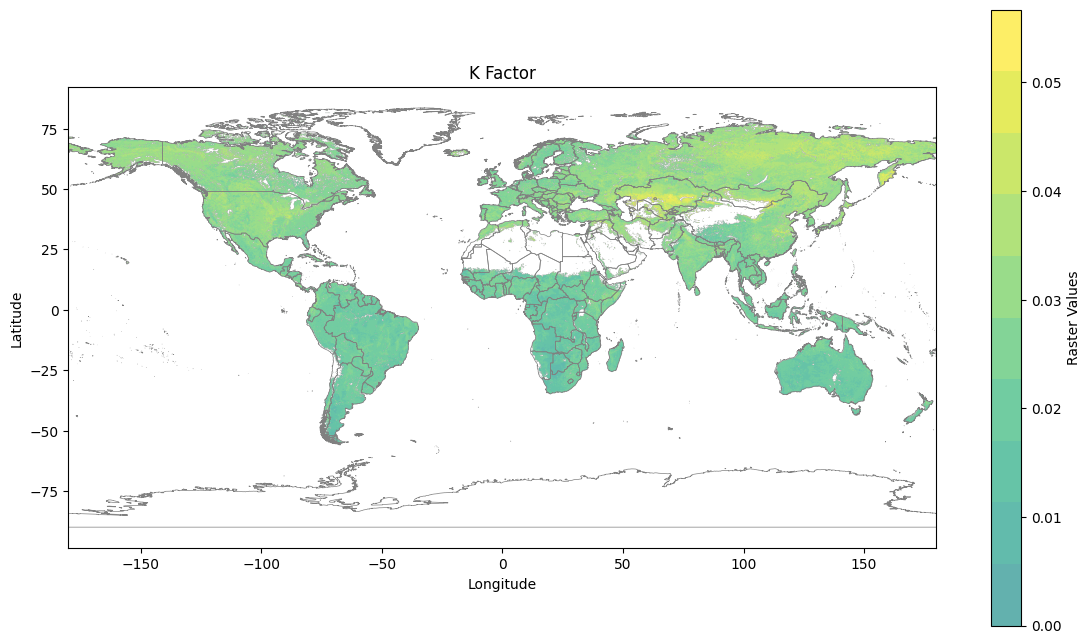

In [6]:
mp.plot_raster_on_world_extremes_cutoff(k_fp, "K Factor", alpha=0, quantiles=10)

Raster has 220,799 different values. Min: 0.15. Max: 38.19
Using quantiles
All positives route


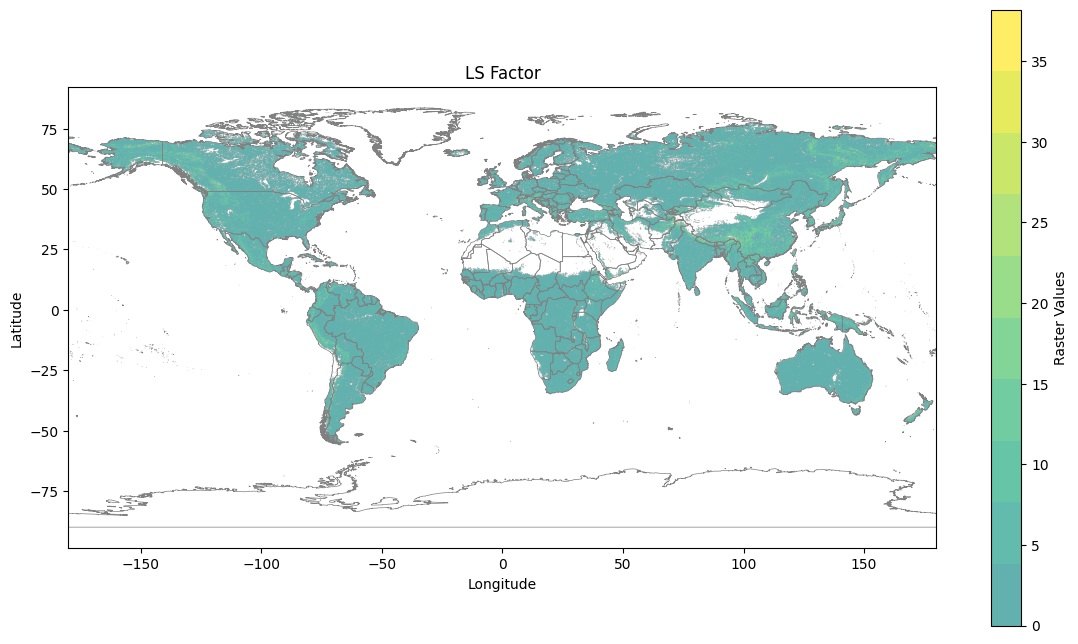

In [7]:
mp.plot_raster_on_world_extremes_cutoff(ls_fp, "LS Factor", alpha=0, quantiles=10)

Raster has 278,546 different values. Min: 0.00. Max: 26,179.59
Using quantiles
All positives route


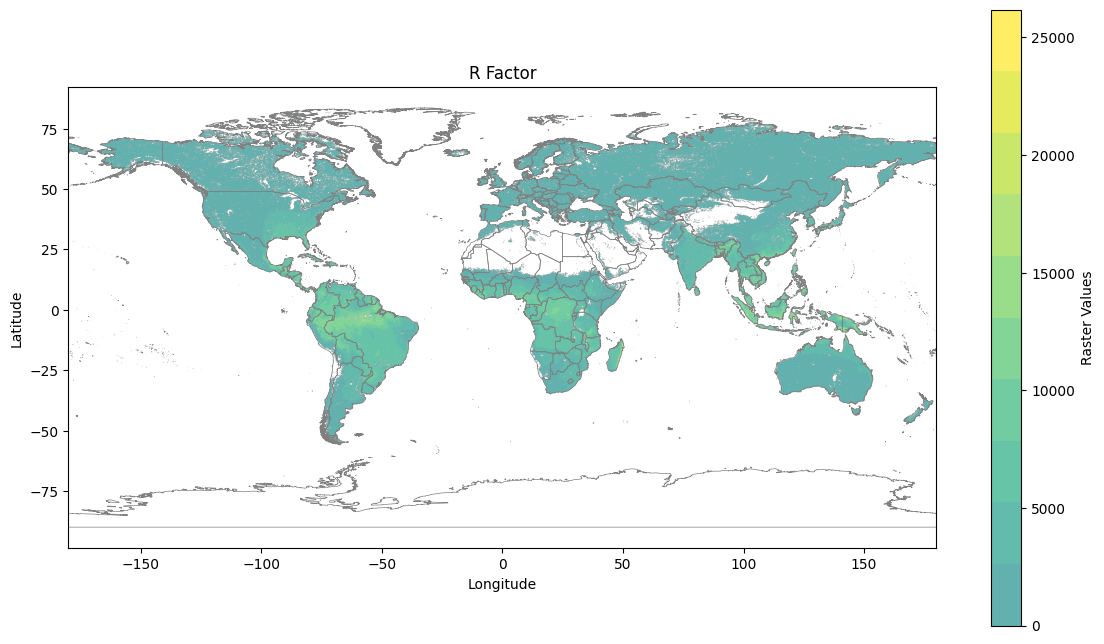

In [8]:
mp.plot_raster_on_world_extremes_cutoff(r_fp, "R Factor", alpha=0, quantiles=10)

In [9]:
mp.inspect_raster(ls_fp)

File: ../data/soil_erosion/GloSEM_v1.1/RUSLE_LSFactor_v1.1_25km.tif
Driver: GTiff
Width, Height: 1728, 673
Number of Bands: 1
CRS: EPSG:4326
Bounds: BoundingBox(left=-180.0, bottom=-56.6229166666667, right=179.99999999999943, top=83.58541666666642)
Pixel Size: (0.208333333333333, 0.208333333333333)
No-data Value: -3.4028234663852886e+38

--- Raster Metadata ---
TIFFTAG_SOFTWARE: GDAL 3.8.1e (3080114) (4.6.0;1710;3.0.1;2.1.6;;0x10302;5.4.5;), PROJ 9.3.1 (EPSG.VERSION=v10.098;EPSG.DATE=2023-11-24;ESRI.VERSION=ArcGIS Pro 3.2;ESRI.DATE=2023-11-02;PROJ_DATA.VERSION=1.16;)
AREA_OR_POINT: Area

--- Band Information ---

Band 1:
  Data Type: float32
  Min Value: 0.15429238975048065
  Max Value: 38.18529510498047
  Mean Value: 1.7793327569961548
  Standard Deviation: 3.262052059173584
  Band Metadata:
    STATISTICS_MAXIMUM: 38.18529510498
    STATISTICS_MEAN: 1.7793328181477
    STATISTICS_MINIMUM: 0.15429238975048
    STATISTICS_SKIPFACTORX: 1
    STATISTICS_SKIPFACTORY: 1
    STATISTICS_STDD

As expected from sourcing all layers from a single reference, they all coincide in their GIS properties and can be multiplied without further transformations.

In [15]:
# Defining raster list
rlsk_inputs = [r_fp, ls_fp, k_fp]
rlsk_fp = "../data/soil_erosion/rlsk_2012.tif"

rlsk = mc.multiply_rasters(rlsk_inputs, output_path=rlsk_fp)

Raster saved into ../data/soil_erosion/rlsk_2012.tif


Inspecting the results...

In [13]:
mp.inspect_raster(rlsk_fp)

File: ../data/soil_erosion/sf_2012.tif
Driver: GTiff
Width, Height: 1728, 673
Number of Bands: 1
CRS: EPSG:4326
Bounds: BoundingBox(left=-180.0, bottom=-56.6229166666667, right=179.99999999999943, top=83.58541666666642)
Pixel Size: (0.208333333333333, 0.208333333333333)
No-data Value: -1.7976931348623157e+308

--- Raster Metadata ---
AREA_OR_POINT: Area

--- Band Information ---

Band 1:
  Data Type: float64
  Min Value: 0.0
  Max Value: 10179.745188638457
  Mean Value: 96.62198062560604
  Standard Deviation: 294.14528533731226


Raster has 278,546 different values. Min: 0.00. Max: 10,179.75
Using quantiles
All positives route


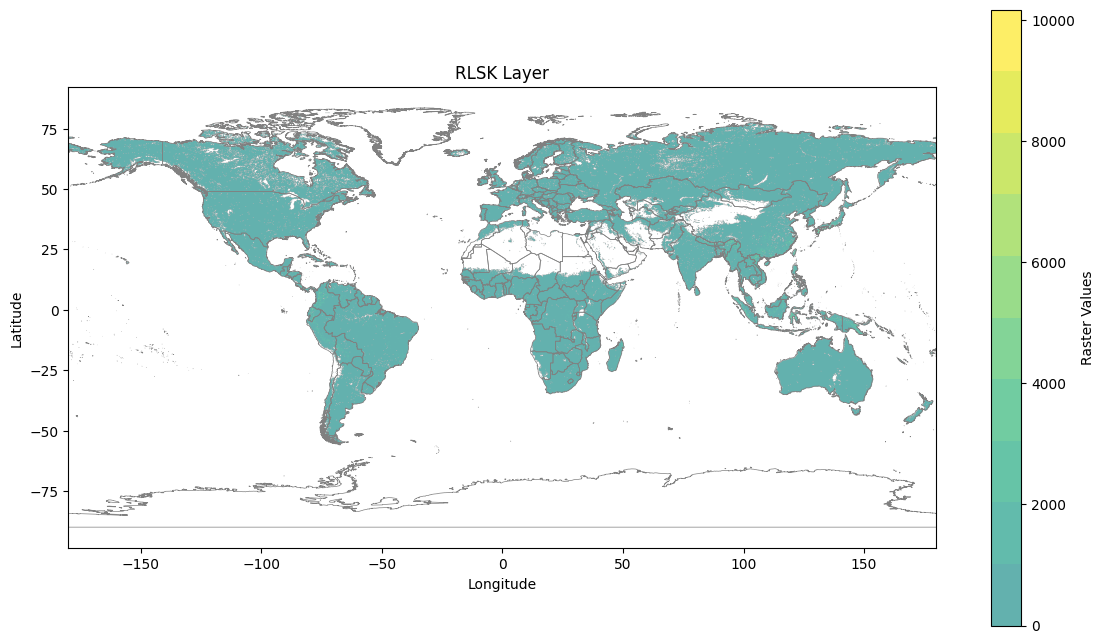

In [17]:
mp.plot_raster_on_world_extremes_cutoff(rlsk_fp, title="RLSK Layer", alpha=0, quantiles=10)

Which shows that the layer has been correctly generated. Moving on.

## Step 2 - Crop C-Factor
Next step is generating a layer of C factors for each land use map. In this case, C-factors are assigned according to tables 1 and 2 of Soil Erosion Documentation, which have been pre-assigned and can be found on the file [`lu_c_factor_inventory`](../data/crops/lu_c_factor_inventory.xlsx). This file additionally contains all raster names, paths, commodities and their categorization, irrigation type, and crop residues management type.

Importing the file and inspecting the file

In [22]:
files_inventory = pl.read_excel("../data/crops/lu_c_factor_inventory.xlsx")

In [23]:
files_inventory.head()

file_name,land_use,path,crop_name,irrigation_type,on_off_field,crop_type,crop_subtype,c_crop,c_res,c_final
str,str,str,str,str,str,str,str,f64,f64,f64
"""lu_Broadleaf_Deciduous_Boreal_…","""Broadleaf_Deciduous_Boreal_dry""","""../data/land_use/lu_Broadleaf_…","""Broadleaf_Deciduous_Boreal_dry""","""NA""","""NA""","""Forest""","""Natural""",0.003,1.0,0.003
"""lu_Broadleaf_Deciduous_Boreal_…","""Broadleaf_Deciduous_Boreal_moi…","""../data/land_use/lu_Broadleaf_…","""Broadleaf_Deciduous_Boreal_moi…","""NA""","""NA""","""Forest""","""Natural""",0.003,1.0,0.003
"""lu_Broadleaf_Deciduous_Cold_te…","""Broadleaf_Deciduous_Cold_tempe…","""../data/land_use/lu_Broadleaf_…","""Broadleaf_Deciduous_Cold_tempe…","""NA""","""NA""","""Forest""","""Natural""",0.003,1.0,0.003
"""lu_Broadleaf_Deciduous_Cold_te…","""Broadleaf_Deciduous_Cold_tempe…","""../data/land_use/lu_Broadleaf_…","""Broadleaf_Deciduous_Cold_tempe…","""NA""","""NA""","""Forest""","""Natural""",0.003,1.0,0.003
"""lu_Broadleaf_Deciduous_Subtrop…","""Broadleaf_Deciduous_Subtropica…","""../data/land_use/lu_Broadleaf_…","""Broadleaf_Deciduous_Subtropica…","""NA""","""NA""","""Forest""","""Natural""",0.003,1.0,0.003


Next step is to generate the C-Factor value in the original land use raster resolution (~10km) and then downsampling to 25km from the RLSK layer. The 10km files have not been preserved, but can be generated as follow:

In [24]:
output_folder = "../data/soil_erosion/C_Factors/10km/"

In [ ]:
output_folder = "../data/soil_erosion/C_Factors/10km/"

for row in files_inventory.iter_rows(named=True):
    input_path = row["path"]
    c_factor = row["c_final"]
    land_use_type = row["land_use"]
    output_path = output_folder + "cfactor_10km_" + land_use_type + ".tif"

    print(f"Rasterizing {land_use_type} land use with a c factor of {c_factor}")

    mc.create_binary_mask(input_path, output_path, binary_value=c_factor, src_nodata=255, dst_nodata=np.nan)
    print(f"{land_use_type} rasterized succesfully!\n")

And the downsampling can be perform then as:

In [ ]:
input_folder = "../data/soil_erosion/C_Factors/10km/"
output_folder = "../data/soil_erosion/C_Factors/25km/"

for file in os.listdir(input_folder):
    # file names
    file_name = os.path.basename(file)
    new_file_name = file_name.replace("10km", "25km")
    input_path = input_folder + file_name
    output_path = output_folder + new_file_name
    
    # Operation
    mc.resample_to_match(src_path=input_path, target_path=rlsk_fp, output_path=output_path)
    print(f"{file_name} resampled into rlsk raster resoltuion")
    

cfactor_10km_Broadleaf_Deciduous_Boreal_dry.tif resampled into rlsk raster resoltuion

cfactor_10km_Broadleaf_Deciduous_Boreal_moist.tif resampled into rlsk raster resoltuion

cfactor_10km_Broadleaf_Deciduous_Cold_temperate_dry.tif resampled into rlsk raster resoltuion

cfactor_10km_Broadleaf_Deciduous_Cold_temperate_moist.tif resampled into rlsk raster resoltuion

cfactor_10km_Broadleaf_Deciduous_Subtropical.tif resampled into rlsk raster resoltuion

cfactor_10km_Broadleaf_Deciduous_Tropical.tif resampled into rlsk raster resoltuion

cfactor_10km_Broadleaf_Deciduous_Warm_temperate_dry.tif resampled into rlsk raster resoltuion

cfactor_10km_Broadleaf_Deciduous_Warm_temperate_moist.tif resampled into rlsk raster resoltuion

cfactor_10km_Grassland.tif resampled into rlsk raster resoltuion

cfactor_10km_Irrigated_Apples.tif resampled into rlsk raster resoltuion

cfactor_10km_Irrigated_Bananas.tif resampled into rlsk raster resoltuion

cfactor_10km_Irrigated_Barley_residues_left_on_the_fie

Inpsecting wheat as it has both crop residues management options

In [30]:
mp.inspect_raster("../data/soil_erosion/C_Factors/25km/cfactor_25km_Rainfed_Wheat_residues_removed_from_the_field.tif")

File: ../data/soil_erosion/C_Factors/25km/cfactor_25km_Rainfed_Wheat_residues_removed_from_the_field.tif
Driver: GTiff
Width, Height: 1728, 673
Number of Bands: 1
CRS: EPSG:4326
Bounds: BoundingBox(left=-180.0, bottom=-56.6229166666667, right=179.99999999999943, top=83.58541666666642)
Pixel Size: (0.208333333333333, 0.208333333333333)
No-data Value: nan

--- Raster Metadata ---
AREA_OR_POINT: Area

--- Band Information ---

Band 1:
  Data Type: float32
  Min Value: 0.20000000298023224
  Max Value: 0.20000000298023224
  Mean Value: 0.20000001788139343
  Standard Deviation: 1.4901161193847656e-08


Raster has 1 different values. Min: 0.20. Max: 0.20


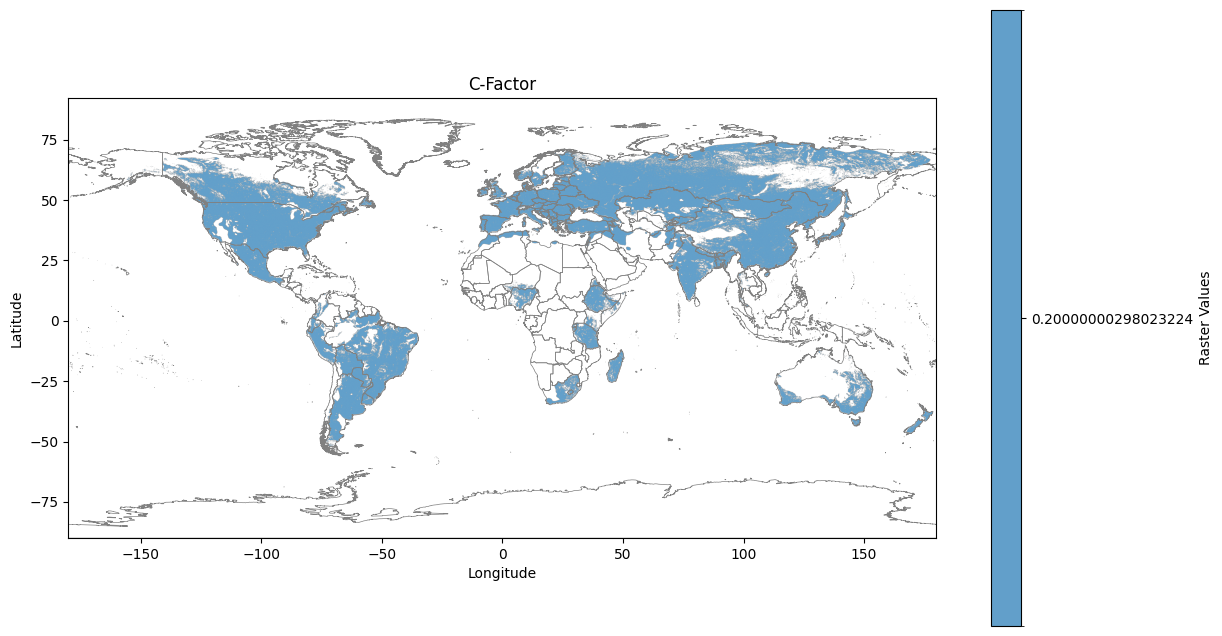

In [34]:
mp.plot_raster_on_world_extremes_cutoff("../data/soil_erosion/C_Factors/10km/cfactor_10km_Rainfed_Wheat_residues_removed_from_the_field.tif", "C-Factor", alpha=0)

In [35]:
mp.inspect_raster("../data/soil_erosion/C_Factors/25km/cfactor_25km_Rainfed_Wheat_residues_left_on_the_field.tif")

File: ../data/soil_erosion/C_Factors/25km/cfactor_25km_Rainfed_Wheat_residues_left_on_the_field.tif
Driver: GTiff
Width, Height: 1728, 673
Number of Bands: 1
CRS: EPSG:4326
Bounds: BoundingBox(left=-180.0, bottom=-56.6229166666667, right=179.99999999999943, top=83.58541666666642)
Pixel Size: (0.208333333333333, 0.208333333333333)
No-data Value: nan

--- Raster Metadata ---
AREA_OR_POINT: Area

--- Band Information ---

Band 1:
  Data Type: float32
  Min Value: 0.17599999904632568
  Max Value: 0.17599999904632568
  Mean Value: 0.17599999904632568
  Standard Deviation: 0.0


Raster has 1 different values. Min: 0.18. Max: 0.18


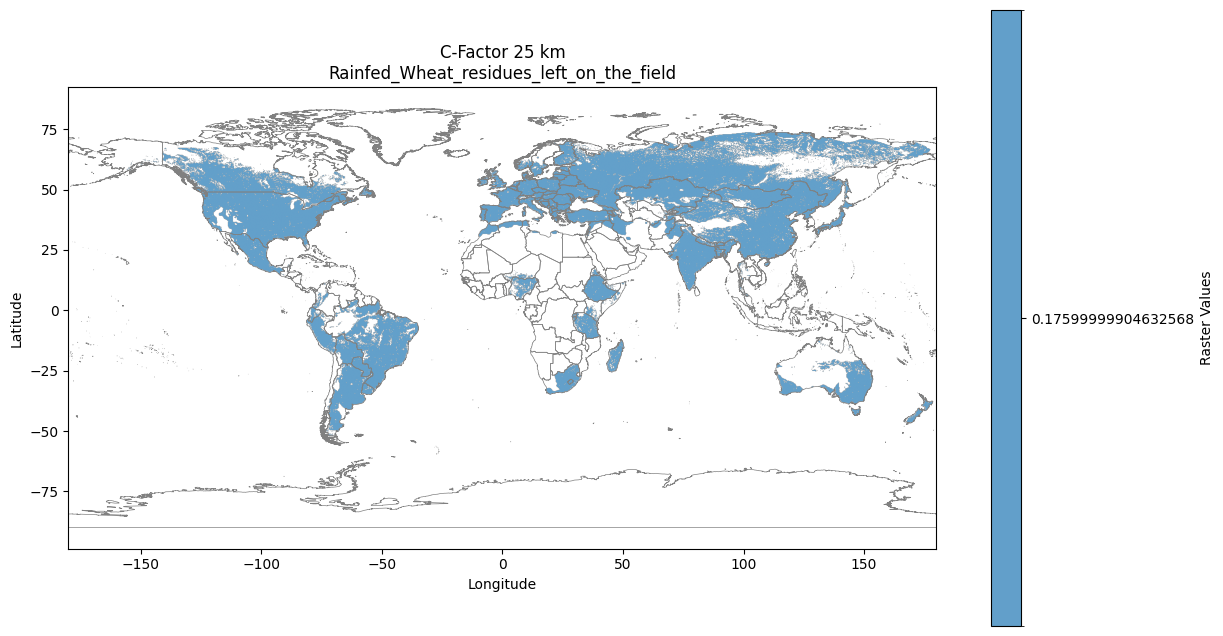

In [36]:
mp.plot_raster_on_world_extremes_cutoff("../data/soil_erosion/C_Factors/25km/cfactor_25km_Rainfed_Wheat_residues_left_on_the_field.tif", "C-Factor 25 km\nRainfed_Wheat_residues_left_on_the_field", alpha=0)

### TODO - Tillage

## Step 3 - Calculate LEAFs Soil Erosion for each land use
Now that both the RLSK layer and the C-Factor layers have been generated, soil erosion factors can be simply calculated as the multiplication of both. 

This can be done as:

In [70]:
input_folder = "../data/soil_erosion/C_Factors/25km/"
output_folder = "../LEAFs/soil_erosion/"

for file in os.listdir(input_folder):
    # file names
    file_name = os.path.basename(file)
    new_file_name = file_name.replace("cfactor", "se_rate")
    input_path = input_folder + file_name
    output_path = output_folder + new_file_name
    
    # Operation
    mc.multiply_rasters([rlsk_fp, input_path], output_path)
    print(f"Soil erosion calculated for {file_name}")

Soil erosion calculated for cfactor_25km_Broadleaf_Deciduous_Boreal_dry.tif

Soil erosion calculated for cfactor_25km_Broadleaf_Deciduous_Boreal_moist.tif

Soil erosion calculated for cfactor_25km_Broadleaf_Deciduous_Cold_temperate_dry.tif

Soil erosion calculated for cfactor_25km_Broadleaf_Deciduous_Cold_temperate_moist.tif

Soil erosion calculated for cfactor_25km_Broadleaf_Deciduous_Subtropical.tif

Soil erosion calculated for cfactor_25km_Broadleaf_Deciduous_Tropical.tif

Soil erosion calculated for cfactor_25km_Broadleaf_Deciduous_Warm_temperate_dry.tif

Soil erosion calculated for cfactor_25km_Broadleaf_Deciduous_Warm_temperate_moist.tif

Soil erosion calculated for cfactor_25km_Grassland.tif

Soil erosion calculated for cfactor_25km_Irrigated_Apples.tif

Soil erosion calculated for cfactor_25km_Irrigated_Bananas.tif

Soil erosion calculated for cfactor_25km_Irrigated_Barley_residues_left_on_the_field.tif

Soil erosion calculated for cfactor_25km_Irrigated_Barley_residues_removed

Inpsecting the same land use as before...

In [40]:
wheat_ron_se_leaf_fp = "../LEAFs/soil_erosion/raster/se_rate_25km_Rainfed_Wheat_residues_left_on_the_field.tif"
wheat_roff_se_leaf_fp = "../LEAFs/soil_erosion/raster/se_rate_25km_Rainfed_Wheat_residues_removed_from_the_field.tif"

Raster has 160,954 different values. Min: 0.00. Max: 2,035.95
Using quantiles
All positives route


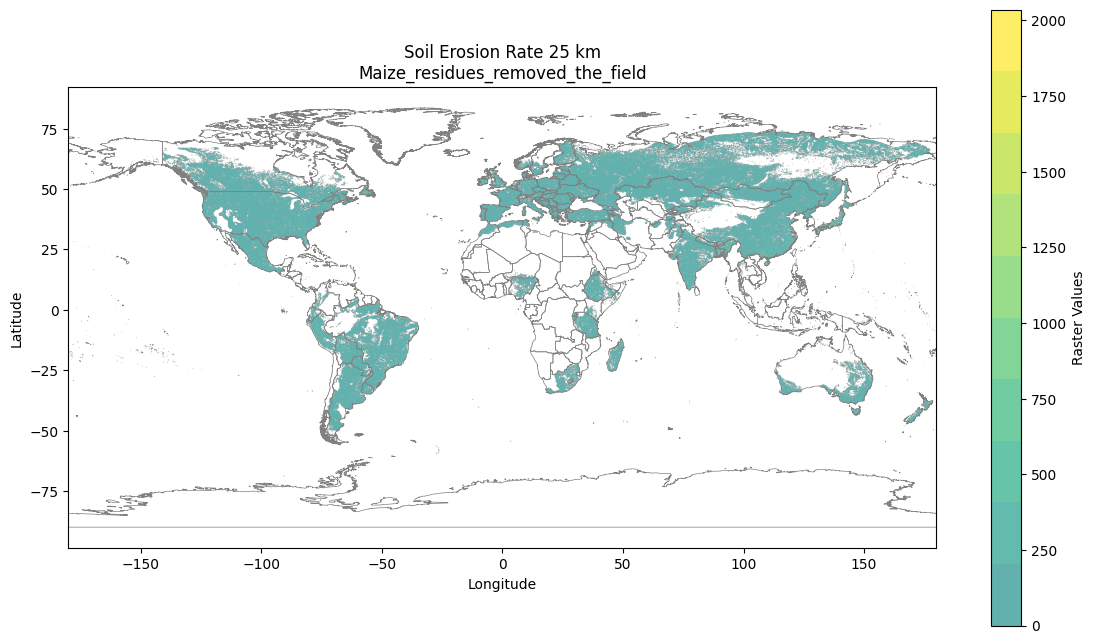

In [48]:
mp.plot_raster_on_world_extremes_cutoff(wheat_roff_se_leaf_fp, "Soil Erosion Rate 25 km\nMaize_residues_removed_the_field", alpha=0, quantiles=10)

Raster has 163,964 different values. Min: 0.00. Max: 1,791.64
Using quantiles
All positives route


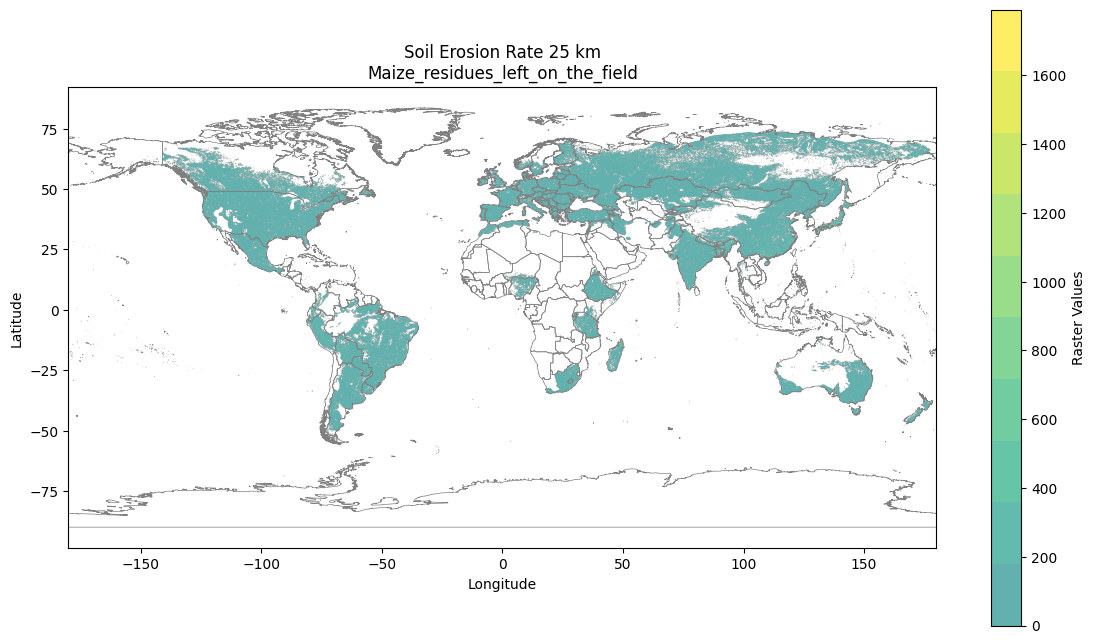

In [49]:
mp.plot_raster_on_world_extremes_cutoff(wheat_ron_se_leaf_fp, "Soil Erosion Rate 25 km\nMaize_residues_left_on_the_field", alpha=0, quantiles=10)

As it can be seen, there seems to be some outliers, with same erosionr rates going over 1,000 ton soil per year. Plotting with a 95% range of values:

Raster has 145,218 different values. Min: 0.24. Max: 86.62
Using quantiles
All positives route


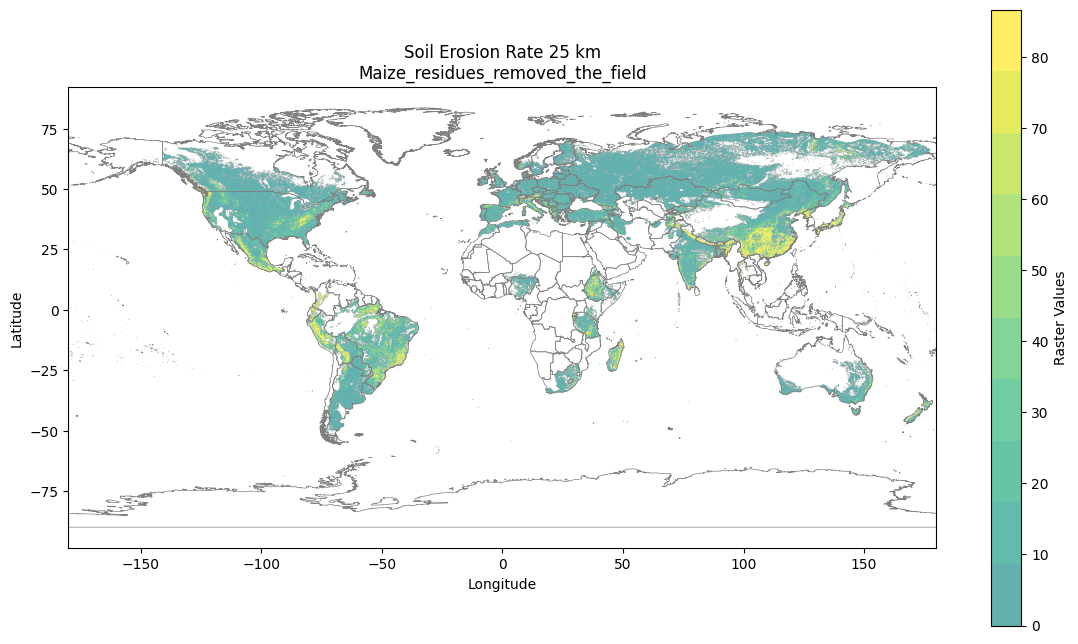

In [51]:
mp.plot_raster_on_world_extremes_cutoff(wheat_roff_se_leaf_fp, "Soil Erosion Rate 25 km\nMaize_residues_removed_the_field", alpha=5, quantiles=10)

Raster has 147,926 different values. Min: 0.21. Max: 76.11
Using quantiles
All positives route


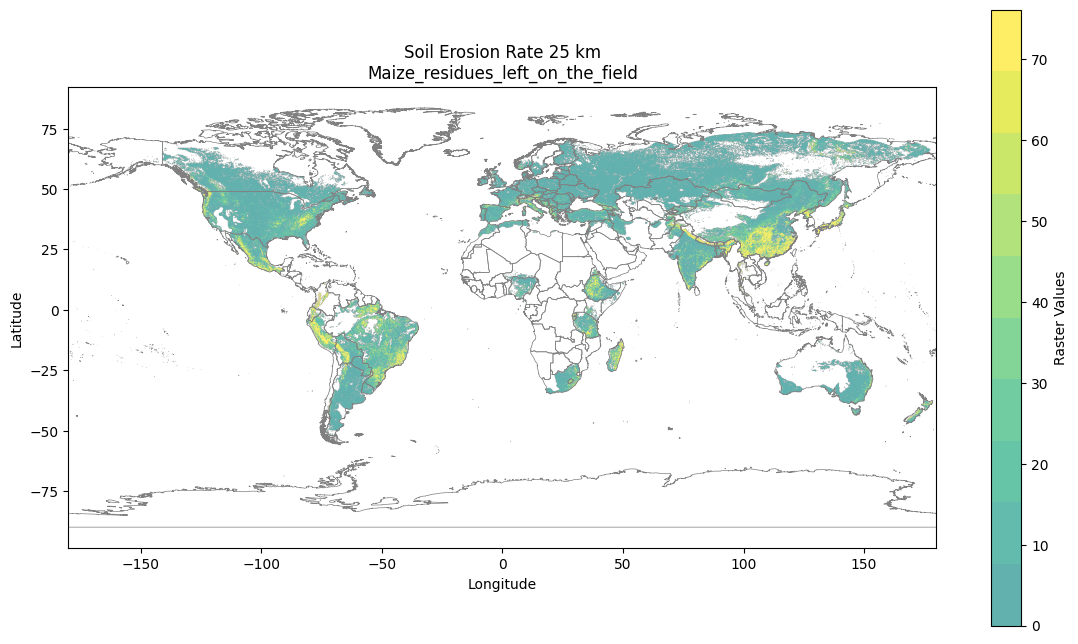

In [52]:
mp.plot_raster_on_world_extremes_cutoff(wheat_ron_se_leaf_fp, "Soil Erosion Rate 25 km\nMaize_residues_left_on_the_field", alpha=5, quantiles=10)

It shows a much more sensible map. It also shows that the maximum rates for leaving residues on the field erosion rates are lower, as expected.

## Step 4 - Country, Sub-country, and Ecoregion averages
After calculating a LEAF soil erosion raster for each land use, it's time to calculate averages per country, sub-country, and ecoregions. These are calculated as area-weighted ones. 

### Step 4.1 - Outliers filtering
Before proceeding to calculate averages per polygon, calculated erosion rates should be analyzed to defined the best way to deal with potential outliers.

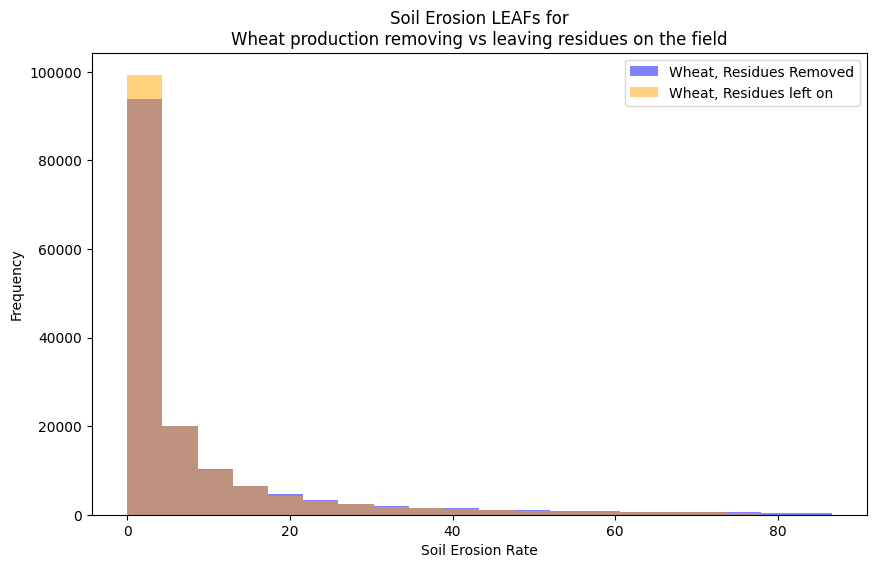

In [ ]:
mp.plot_overlapping_histograms(
    raster1_path=wheat_roff_se_leaf_fp,
    raster2_path=wheat_ron_se_leaf_fp,
    title="Soil Erosion LEAFs for\nWheat production removing vs leaving residues on the field",
    x_label="Soil Erosion Rate",
    label1="Wheat, Residues Removed",
    label2="Wheat, Residues left on",
    bins = 20,
    quantiles_tails='right',
    filter_quantiles=0.05
)

In [ ]:
import rasterio

In [ ]:
with rasterio.open(wheat_roff_se_leaf_fp) as src:
    data = src.read(1, masked=True)

In [ ]:
with rasterio.open(wheat_roff_se_leaf_fp) as src:
    data = src.read(1, masked=True)

data_f = data.compressed()

In [ ]:
data_f

array([nan, nan, nan, ..., nan, nan, nan], shape=(279421,))

Now transforming with $data_t = \log(1+data)$. As this preserves 0 values (log(1) = 0)

In [ ]:
data_t = np.log1p(data_f)

This looks better distributed

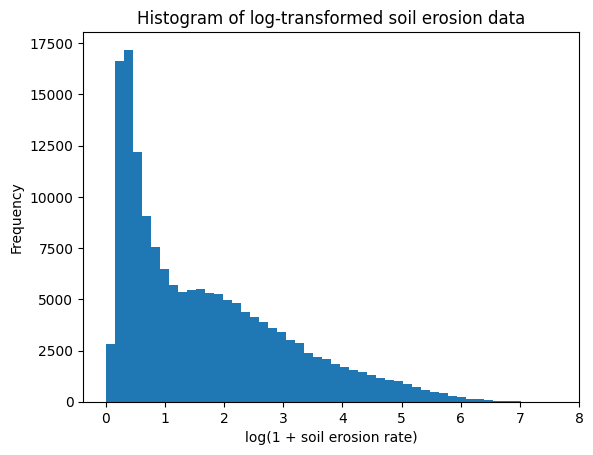

In [ ]:
plt.hist(data_t[~np.isnan(data_t)], bins=50)
plt.title("Histogram of log-transformed soil erosion data")
plt.xlabel("log(1 + soil erosion rate)")
plt.ylabel("Frequency")
plt.show()

Now calculating mean and dev of the logtransformed data

In [ ]:
mean_dt = np.nanmean(data_t)
std_dt = np.nanstd(data_t)

print(f'Log transformed stats: mean: {mean_dt}, std: {std_dt}')

Log transformed stats: mean: 1.678990030025431, std: 1.3798155592670553


Untransformed logstats

In [ ]:
mead_data = np.exp(mean_dt) - 1
mean_std = np.exp(std_dt) - 1

print(f'Back transformed stats: mean: {mead_data}, std: {mean_std}')
print(f'Regular mean and std before transormation: mean {np.nanmean(data_f)} - std {np.nanstd(data_f)}')

Back transformed stats: mean: 4.360139656312342, std: 2.9741685613308984
Regular mean and std before transormation: mean 18.016991082418958 - std 53.33236638705852


Which can be seen are vastly different. Calculating a cap of $x_{cut} = \exp(\mu + 3\sigma) - 1$ to use as filter

In [ ]:
data_cut = np.exp(mean_dt + 3*std_dt) - 1
print(f'x_cut point is {data_cut}')

x_cut point is 335.4456794015313


Finally filtering the data

In [ ]:
data_f2 = data[data<=data_cut]

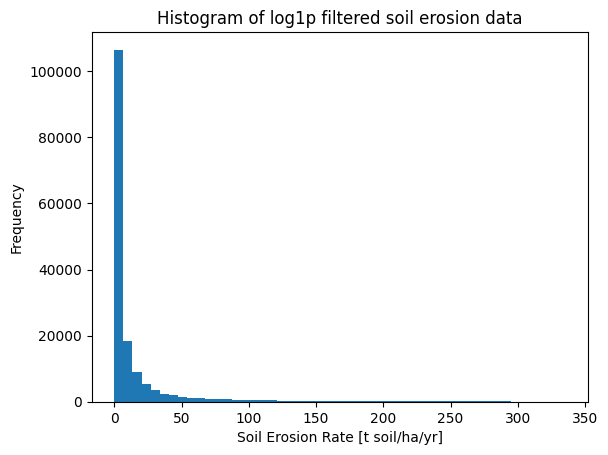

In [ ]:
plt.hist(data_f2, bins=50)
plt.title("Histogram of log1p filtered soil erosion data")
plt.xlabel("Soil Erosion Rate [t soil/ha/yr]")
plt.ylabel("Frequency")
plt.show()

### Step 4.2 - LEAFs averages

In [4]:
# Your calculator must accept (raster_path, **kwargs) and return (df, gdf)
# For example:
# def calculate_area_weighted_cfs_from_raster_with_std_and_median_vOutliers(raster_path, **kwargs): ...

from functools import partial

# Defining needed inputs
calc = mc.calculate_area_weighted_cfs_from_raster_with_std_and_median_vOutliers
country_shp = gpd.read_file("../data/CountryLayers/Country_Level0/g2015_2014_0.shp")
master_key = "ADM0_NAME"

Checking to see if there are duplicated rows...

In [9]:
# Prepare master_gdf if it has several repeated rows
repated_master_key_rows = country_shp[master_key][country_shp[master_key].duplicated()].unique()
repated_master_key_amount = repated_master_key_rows.shape[0]
print(f"There are {repated_master_key_amount} repeated rows, which are:\n {repated_master_key_rows}")

if repated_master_key_amount > 0:
    print('Eliminating duplicat rows')
    corrected_shp = mc.prep_master_unique(country_shp, "ADM0_NAME", strategy="dissolve")

There are 1 repeated rows, which are:
 ['West Bank']
Eliminating duplicat rows


Saving it as it takes a long time...

In [ ]:
# corrected_shp.to_file('../data/CountryLayers/Country_Level0/g2015_2014_0_dissolved.shp')

In [3]:
corrected_shp = gpd.read_file('../data/CountryLayers/Country_Level0/g2015_2014_0_dissolved.shp')

Now running the function. Considering soil erosion rates distribution, we'll use the same outliers filtering method as previously shown.

In [ ]:
import importlib
importlib.reload(mc)

: 

In [27]:
gpkg_path, df_results = mc.build_cfs_gpkg_from_rasters(
    input_folder = "../LEAFs/soil_erosion/raster/",
    output_folder = "../LEAFs/soil_erosion/country/",
    layer_name="se_leaf_country_long",
    master_gdf=corrected_shp,   # e.g., countries, subcountries, or ecoregions
    master_key="ADM0_NAME",            # or 'ISO_A3', 'ADM1_NAME', 'ECO_NAME'
    result_key="country",              # must match the column emitted by your calc gdf
    input_raster_key="se_rate_25km_",
    cf_name="soil_erosion",
    cf_unit="t soil/ha/yr",
    area_type="country",
    calc_kwargs=dict(outlier_method="log1p_win"),
    reset_gpkg=True,
    promote_to_multi=True,
    add_provenance=True,
    run_test=True
)

print(f"Wrote {df_results.shape[0]} rows into {gpkg_path}")

2025-10-09 15:24:07,416 - INFO - Starting: Calculating country weighted CF for Broadleaf_Deciduous_Boreal_dry using outlier filtering method log1p_win
2025-10-09 15:25:04,527 - INFO - Calculations complete for ../LEAFs/soil_erosion/raster/se_rate_25km_Broadleaf_Deciduous_Boreal_dry.tif! Found matches for 8 regions.

2025-10-09 15:25:09,743 - INFO - Starting: Calculating country weighted CF for Broadleaf_Deciduous_Boreal_moist using outlier filtering method log1p_win
2025-10-09 15:26:05,314 - INFO - Calculations complete for ../LEAFs/soil_erosion/raster/se_rate_25km_Broadleaf_Deciduous_Boreal_moist.tif! Found matches for 8 regions.

2025-10-09 15:26:09,595 - INFO - Starting: Calculating country weighted CF for Broadleaf_Deciduous_Cold_temperate_dry using outlier filtering method log1p_win
2025-10-09 15:26:53,040 - INFO - Calculations complete for ../LEAFs/soil_erosion/raster/se_rate_25km_Broadleaf_Deciduous_Cold_temperate_dry.tif! Found matches for 58 regions.



Wrote 828 rows into ../LEAFs/soil_erosion/country/soil_erosion_country.gpkg


Checking outputs

In [28]:
gdf_test = gpd.read_file(gpkg_path, layer="se_leaf_country_long")
gdf_test.head()

,ADM0_NAME,imp_cat,flow_name,unit,cf,cf_median,cf_std,_source_file,geometry
0,Abyei,soil_erosion,Broadleaf_Deciduous_Boreal_dry,t soil/ha/yr,NaN,NaN,NaN,se_rate_25km_Broadleaf_Deciduous_Boreal_dry.tif,"MULTIPOLYGON (((2795884.002 1224311.08, 279588..."
1,Afghanistan,soil_erosion,Broadleaf_Deciduous_Boreal_dry,t soil/ha/yr,NaN,NaN,NaN,se_rate_25km_Broadleaf_Deciduous_Boreal_dry.tif,"MULTIPOLYGON (((6850483.926 4556028.284, 68512..."
2,Aksai Chin,soil_erosion,Broadleaf_Deciduous_Boreal_dry,t soil/ha/yr,NaN,NaN,NaN,se_rate_25km_Broadleaf_Deciduous_Boreal_dry.tif,"MULTIPOLYGON (((7617392.099 4026862.439, 76164..."
3,Albania,soil_erosion,Broadleaf_Deciduous_Boreal_dry,t soil/ha/yr,NaN,NaN,NaN,se_rate_25km_Broadleaf_Deciduous_Boreal_dry.tif,"MULTIPOLYGON (((1860613.351 4756904.449, 18611..."
4,Algeria,soil_erosion,Broadleaf_Deciduous_Boreal_dry,t soil/ha/yr,NaN,NaN,NaN,se_rate_25km_Broadleaf_Deciduous_Boreal_dry.tif,"MULTIPOLYGON (((-184610.278 4207929.615, -1845..."


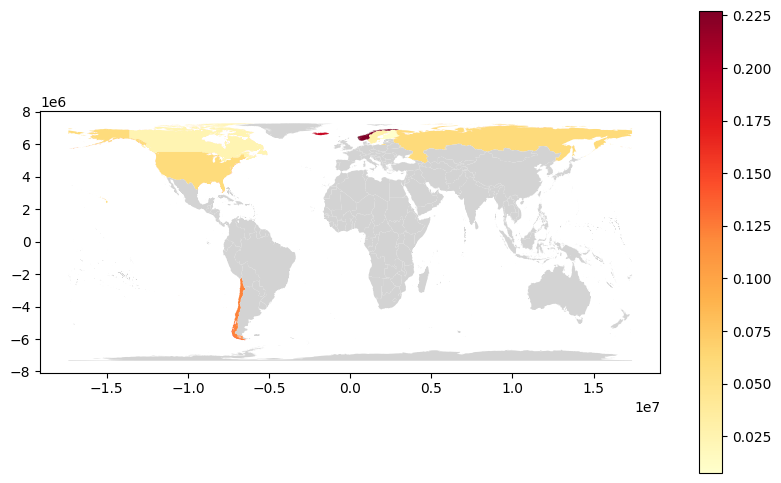

In [29]:
target_flow = "Broadleaf_Deciduous_Boreal_dry"
subset = gdf_test[gdf_test["flow_name"] == target_flow]

# Plot the subset with cf values
ax = subset.plot(column="cf", legend=True, cmap="YlOrRd", figsize=(10,6), missing_kwds={"color": "lightgrey"})

Checking df

In [30]:
df_results.head()

,ADM0_NAME,imp_cat,unit,value,metric
0,Abyei,soil_erosion,t soil/ha/yr,NaN,cf_mean
1,Afghanistan,soil_erosion,t soil/ha/yr,0.073177,cf_mean
2,Aksai Chin,soil_erosion,t soil/ha/yr,NaN,cf_mean
3,Albania,soil_erosion,t soil/ha/yr,1.123012,cf_mean
4,Algeria,soil_erosion,t soil/ha/yr,NaN,cf_mean
